In [1]:
%pip install wordcloud

     ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/153.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/153.3 kB ? eta -:--:--
     -------------- ---------------------- 61.4/153.3 kB 409.6 kB/s eta 0:00:01
     ---------------------------- ------- 122.9/153.3 kB 654.9 kB/s eta 0:00:01
     ------------------------------------ 153.3/153.3 kB 704.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [6]:
%pwd

'c:\\Users\\kiw\\github_15zd\\data_mining'

In [3]:
all_files = glob.glob('data/myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['data\\myCabinetExcelData (1).xls',
 'data\\myCabinetExcelData (2).xls',
 'data\\myCabinetExcelData (3).xls',
 'data\\myCabinetExcelData (4).xls',
 'data\\myCabinetExcelData (5).xls',
 'data\\myCabinetExcelData (6).xls',
 'data\\myCabinetExcelData (7).xls',
 'data\\myCabinetExcelData (8).xls',
 'data\\myCabinetExcelData (9).xls',
 'data\\myCabinetExcelData.xls']

In [11]:
%pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     -------------------------------------- - 92.2/96.5 kB 5.1 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
all_files_data = [] #저장할 리스트
for file in all_files: 
    data_frame = pd.read_excel(file) 
    all_files_data.append(data_frame) 
all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Cloud Computing...,"Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir",Mary Ann Leibert,2021
1,NaN,2,SOOM: Sort-Based Optimizer for Big Data Multi-...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2020
2,NaN,3,The U.S. Army Person-Event Data Environment: A...,unknown,Mary Ann Leibert,2015
3,NaN,4,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
95,NaN,96,HDM: A Composable Framework for Big Data Proce...,"Wu, D.; Zhu, L.; Lu, Q.; Sakr, S.",unknown,2018
96,NaN,97,Distributed Feature Selection for Efficient Ec...,"Zhao, L.; Chen, Z.; Hu, Y.; Min, G.; Jiang, Z.",unknown,2018
97,NaN,98,A concentric framework for leveraging big data...,"Chuang, Ta-Tao; Nakatani, Kazuo; Patil, Vivek H.",Inderscience,2020
98,NaN,99,Structural Balance Theory-Based E-Commerce Rec...,"Qi, L.; Xu, X.; Zhang, X.; Dou, W.; Hu, C.; Zh...",unknown,2018


In [7]:
#데이터 병합
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Call for Special Issue Papers: Cloud Computing...,"Verdu, Elena; Nieto, Yuri Vanessa; Saleem, Nasir",Mary Ann Leibert,2021
1,NaN,2,SOOM: Sort-Based Optimizer for Big Data Multi-...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2020
2,NaN,3,The U.S. Army Person-Event Data Environment: A...,unknown,Mary Ann Leibert,2015
3,NaN,4,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
4,NaN,5,Correction to: Big Data 2016;4:60–66,unknown,Mary Ann Leibert,2016
...,...,...,...,...,...,...
995,NaN,96,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020
996,NaN,97,Big Data Literature Search,unknown,Mary Ann Leibert,2014
997,NaN,98,Agricultural Disaster Risk Management and Capa...,"Wang, Caili; Gao, Yuwen; Aziz, Asad; Ogunmola,...",Mary Ann Leibert,2022
998,NaN,99,A Survey of Biological Data in a Big Data Pers...,"Dall'Alba, Gabriel; Casa, Pedro Lenz; Abreu, F...",Mary Ann Leibert,2022


In [8]:
all_files_data_concat.to_csv('data/riss_bigdata.csv', encoding = 'utf-8', index = False)

In [9]:
# 수집한 데이터에서 제목을 추출하여 전처리를 수행
all_title = all_files_data_concat['제목'] 
all_title #출력하여 내용 확인

0      Call for Special Issue Papers: Cloud Computing...
1      SOOM: Sort-Based Optimizer for Big Data Multi-...
2      The U.S. Army Person-Event Data Environment: A...
3      Call for Special Issue Papers: Big Scientific ...
4                   Correction to: Big Data 2016;4:60–66
                             ...                        
995    Call for Special Issue Papers: Big Data Analyt...
996                           Big Data Literature Search
997    Agricultural Disaster Risk Management and Capa...
998    A Survey of Biological Data in a Big Data Pers...
999    Exploiting Reused-Based Sharing Work Opportuni...
Name: 제목, Length: 1000, dtype: object

In [10]:
# 패키지 다운로드
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kiw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# 전처리 작업을 위해 nltk.corpus에서 제공하는 영어 불용어stopwords.words("english")를 불러와서 저장
stopWords = set(stopwords.words("english"))

# 그 후, 표제어 추출 작업을 제공하는 WordNetLemmatizer 객체를 생성
lemma = WordNetLemmatizer()

In [21]:
# 오류 방지
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kiw\AppData\Roaming\nltk_data...


True

In [12]:
words = [] 

for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) #대문자 소문자로 (정규화)
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #리스트 표현식: w에 대해서 stopWords에 포함 안되는지 체크
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)
    
print(words) #출력하여 내용 확인

[['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot'], ['soom', 'sort', 'based', 'optimizer', 'big', 'data', 'multi', 'query'], ['u', 'army', 'person', 'event', 'data', 'environment', 'military', 'civilian', 'big', 'data', 'enterprise'], ['call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['correction', 'big', 'data'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['big', 'uncertain', 'data', 'multiple', 'sensor', 'efficient', 'processing', 'high', 'order', 'multi', 'hypothesis', 'evidence', 'theoretic', 'approach'], ['deep', 'learning', 'big', 'sparse', 'behavioral', 'data'], ['internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection'], ['big', 'data', 'application', 'guangzhou', 'restaurant', 'analysis'], ['labor', 'economist', 'get', 'microscope', 'big', 'da

In [14]:
#람다식: x,y가 주어졌을 때 리터값이 x+y
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #출력하여 내용 확인

['call', 'special', 'issue', 'paper', 'cloud', 'computing', 'big', 'data', 'cognitive', 'iot', 'soom', 'sort', 'based', 'optimizer', 'big', 'data', 'multi', 'query', 'u', 'army', 'person', 'event', 'data', 'environment', 'military', 'civilian', 'big', 'data', 'enterprise', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'correction', 'big', 'data', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'big', 'uncertain', 'data', 'multiple', 'sensor', 'efficient', 'processing', 'high', 'order', 'multi', 'hypothesis', 'evidence', 'theoretic', 'approach', 'deep', 'learning', 'big', 'sparse', 'behavioral', 'data', 'internet', 'thing', 'based', 'optimized', 'routing', 'big', 'data', 'gathering', 'system', 'landslide', 'detection', 'big', 'data', 'application', 'guangzhou', 'restaurant', 'analysis', 'labor', 'economist', 'get', 'microscope', 'big', 'data', 'labor', 'market

In [15]:
#단어 빈도 카운트
count = Counter(words2) #함수 안쓰고 딕셔너리 노가다 할 수도 있다.
count

Counter({'call': 35,
         'special': 38,
         'issue': 48,
         'paper': 32,
         'cloud': 30,
         'computing': 25,
         'big': 1111,
         'data': 1238,
         'cognitive': 4,
         'iot': 9,
         'soom': 1,
         'sort': 1,
         'based': 103,
         'optimizer': 1,
         'multi': 12,
         'query': 4,
         'u': 8,
         'army': 2,
         'person': 1,
         'event': 1,
         'environment': 12,
         'military': 1,
         'civilian': 1,
         'enterprise': 8,
         'scientific': 10,
         'machine': 26,
         'learning': 48,
         'science': 35,
         'engineering': 12,
         'correction': 4,
         'ensemble': 4,
         'scalable': 14,
         'approach': 59,
         'intrusion': 1,
         'detection': 12,
         'using': 56,
         'framework': 35,
         'uncertain': 1,
         'multiple': 4,
         'sensor': 7,
         'efficient': 18,
         'processing': 26,
         '

In [28]:
# 출현 횟수가 많은 상위 50개 단어 중에서 단어 길이가 1보다 큰 것만 딕셔너리에 저장한 후 출력

word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1238
big : 1111
analytics : 110
based : 103
analysis : 92
driven : 71
system : 62
approach : 59
using : 56
issue : 48
learning : 48
model : 45
challenge : 44
application : 41
new : 41
special : 38
algorithm : 36
call : 35
science : 35
framework : 35
platform : 34
management : 33
health : 33
paper : 32
research : 32
era : 31
cloud : 30
opportunity : 27
technology : 27
machine : 26
processing : 26
mining : 26
network : 26
computing : 25
earth : 25
performance : 25
method : 25
perspective : 24
optimization : 24
business : 23
smart : 23
distributed : 23
process : 23
information : 22
use : 22
intelligence : 21
review : 21
service : 21
development : 20
world : 20


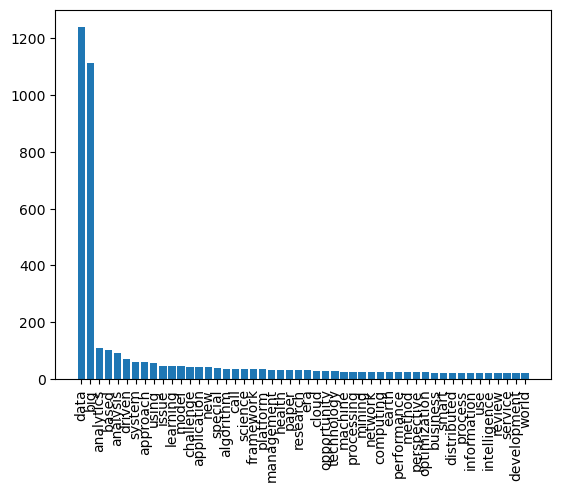

In [26]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True) #reverse =False이면 반대로 그려짐
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical') #키이름이 세로로 쓰기(가로로 쓰기엔 공간이 없다)
plt.show()

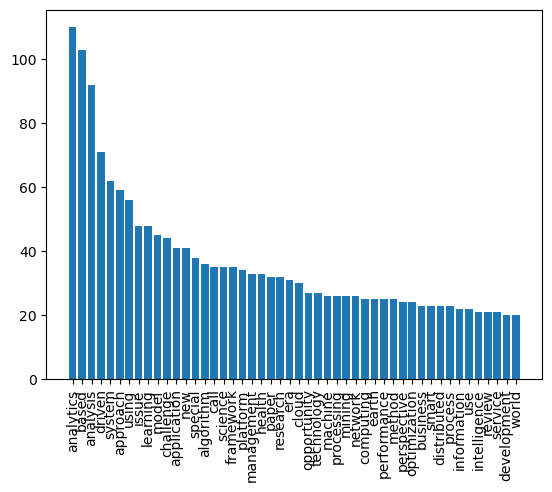

In [29]:
#딕셔너리에서 big,data빼고 그리기
del word_count['big']
del word_count['data']

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

In [19]:
# (concat만 시킨 데이터 프레임에)

# all_files_data_concat에 doc_count 컬럼을 추가한 뒤 0으로 초기화
all_files_data_concat['doc_count'] = 0 #하는 이유?

summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year #출력하여 내용 확인

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2011,5
4,2012,20
5,2013,49
6,2014,123
7,2015,92
8,2016,119
9,2017,126


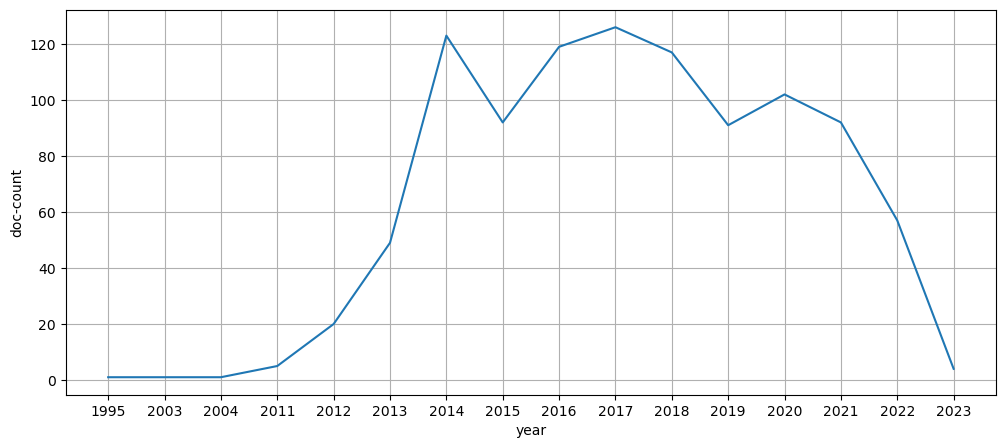

In [20]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

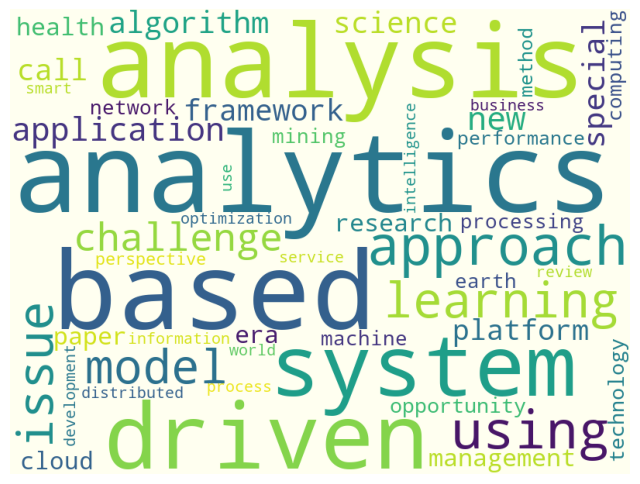

In [21]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)

#word_count: 상위50개 추출한 딕셔너리
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [22]:
word_count

{'analytics': 110,
 'based': 103,
 'analysis': 92,
 'driven': 71,
 'system': 62,
 'approach': 59,
 'using': 56,
 'issue': 48,
 'learning': 48,
 'model': 45,
 'challenge': 44,
 'application': 41,
 'new': 41,
 'special': 38,
 'algorithm': 36,
 'call': 35,
 'science': 35,
 'framework': 35,
 'platform': 34,
 'management': 33,
 'health': 33,
 'paper': 32,
 'research': 32,
 'era': 31,
 'cloud': 30,
 'opportunity': 27,
 'technology': 27,
 'machine': 26,
 'processing': 26,
 'mining': 26,
 'network': 26,
 'computing': 25,
 'earth': 25,
 'performance': 25,
 'method': 25,
 'perspective': 24,
 'optimization': 24,
 'business': 23,
 'smart': 23,
 'distributed': 23,
 'process': 23,
 'information': 22,
 'use': 22,
 'intelligence': 21,
 'review': 21,
 'service': 21,
 'development': 20,
 'world': 20}

과제: 워드 클라우드에 학번 나오게

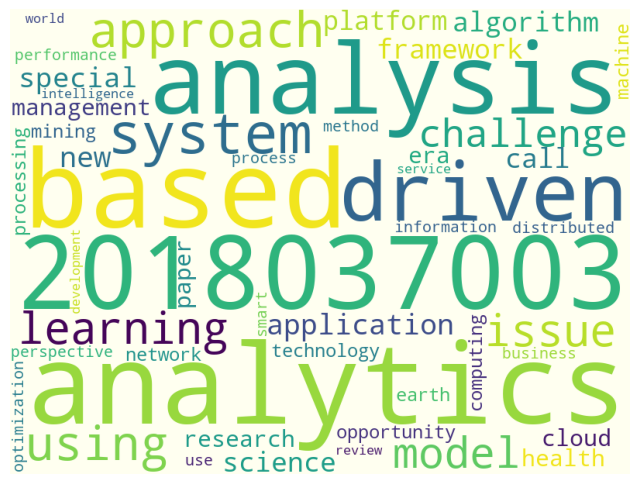

In [30]:
# 2018037003'이라는 키 추가하고 값을 100으로 설정
word_count['2018037003'] = 100

stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)

#word_count: 상위50개 추출한 딕셔너리
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [18]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")